In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalizing the data

In [5]:
x_train,x_test=x_train/255.0,x_test/255.0

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# Function to create model with different activation function

In [8]:
def create_model(activation_function):
  model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128,activation=activation_function),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10,activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [9]:
# list of activation function
activation_functions=['relu','sigmoid','tanh','swish']

# dictionary to store training history
histories={}

# Training the model with different activation function

for activation in activation_functions:
  print(f" Training the model with {activation} activation function...\n")
  model=create_model(activation)
  history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
  histories[str(activation)]=history




 Training the model with relu activation function...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8579 - loss: 0.4890 - val_accuracy: 0.9568 - val_loss: 0.1425
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9536 - loss: 0.1528 - val_accuracy: 0.9659 - val_loss: 0.1101
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9670 - loss: 0.1109 - val_accuracy: 0.9744 - val_loss: 0.0862
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9720 - loss: 0.0904 - val_accuracy: 0.9763 - val_loss: 0.0782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9760 - loss: 0.0753 - val_accuracy: 0.9784 - val_loss: 0.0730
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0614 - val_accuracy: 0.9785 - val_loss: 0.0728
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9817 - loss: 0.0569 - val_accuracy: 0.9790 - val_loss: 0.0656
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0525 -

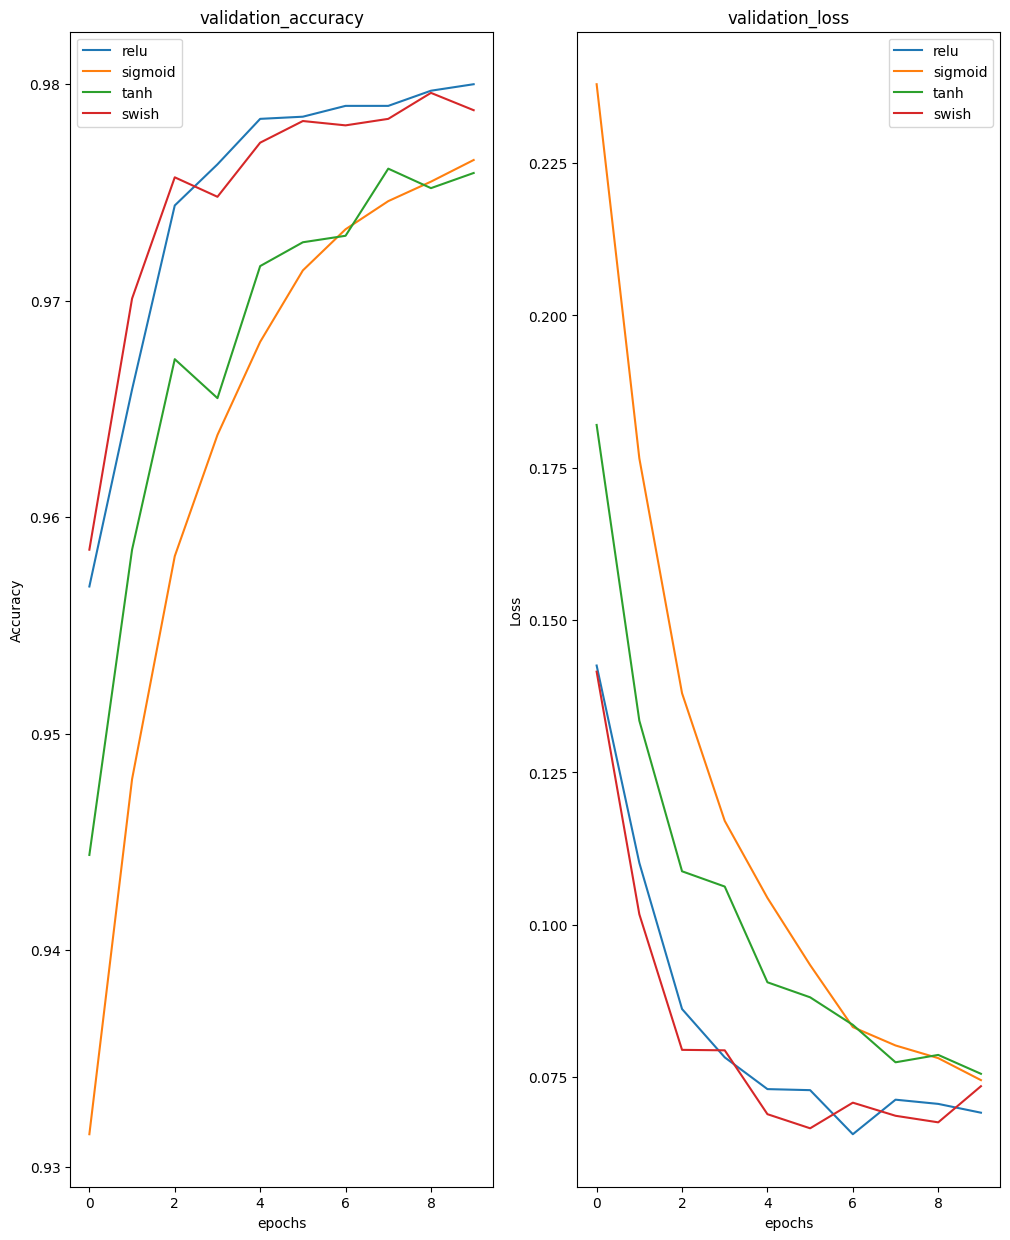

In [12]:
def plot_results(histories):
  plt.figure(figsize=(12,15))
  # accuracy plotting
  plt.subplot(1,2,1)
  for activation,history in histories.items():

    plt.plot(history.history['val_accuracy'],label=f'{activation}')
  plt.title('validation_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.legend()


  # plotting loss
  plt.subplot(1,2,2)
  for activation,history in histories.items():
    plt.plot(history.history['val_loss'],label=f'{activation}')
  plt.title('validation_loss')
  plt.xlabel('epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()


plot_results(histories)

